In [117]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ranksums

## Import Spot Data

Replicate block for each condition in experiment

In [101]:
barrel_1to0_fov1 = pd.read_csv('spot_average/spots_barrel_1to0_fov1.csv')
barrel_1to0_fov2 = pd.read_csv('spot_average/spots_barrel_1to0_fov2.csv')
barrel_1to0 = pd.concat([barrel_1to0_fov1,barrel_1to0_fov2])
barrel_1to0 = barrel_1to0.reset_index()
barrel_1to0 = barrel_1to0.rename(columns={'0':'barrel_1to0'})

In [18]:
barrel_1to1_fov1 = pd.read_csv('spot_average/spots_barrel_1to1_fov1.csv')
barrel_1to1_fov2 = pd.read_csv('spot_average/spots_barrel_1to1_fov2.csv')
barrel_1to1 = pd.concat([barrel_1to1_fov1,barrel_1to1_fov2])
barrel_1to1 = barrel_1to1.reset_index()
barrel_1to1 = barrel_1to1.rename(columns={'0':'barrel_1to1'})

In [20]:
barrel_1to10_fov1 = pd.read_csv('spot_average/spots_barrel_1to10_fov1.csv')
barrel_1to10_fov2 = pd.read_csv('spot_average/spots_barrel_1to10_fov2.csv')
barrel_1to10 = pd.concat([barrel_1to10_fov1,barrel_1to10_fov2])
barrel_1to10 = barrel_1to10.reset_index()
barrel_1to10 = barrel_1to10.rename(columns={'0':'barrel_1to10'})

In [21]:
decbarrel_1to0_fov1 = pd.read_csv('spot_average/spots_decbarrel_1to0_fov1.csv')
decbarrel_1to0_fov2 = pd.read_csv('spot_average/spots_decbarrel_1to0_fov2.csv')
decbarrel_1to0 = pd.concat([decbarrel_1to0_fov1,decbarrel_1to0_fov2])
decbarrel_1to0 = decbarrel_1to0.reset_index()
decbarrel_1to0 = decbarrel_1to0.rename(columns={'0':'decbarrel_1to0'})

In [22]:
decbarrel_1to1_fov1 = pd.read_csv('spot_average/spots_decbarrel_1to1_fov1.csv')
decbarrel_1to1_fov2 = pd.read_csv('spot_average/spots_decbarrel_1to1_fov2.csv')
decbarrel_1to1 = pd.concat([decbarrel_1to1_fov1,decbarrel_1to1_fov2])
decbarrel_1to1 = decbarrel_1to1.reset_index()
decbarrel_1to1 = decbarrel_1to1.rename(columns={'0':'decbarrel_1to1'})

In [23]:
decbarrel_1to10_fov1 = pd.read_csv('spot_average/spots_decbarrel_1to10_fov1.csv')
decbarrel_1to10_fov2 = pd.read_csv('spot_average/spots_decbarrel_1to10_fov2.csv')
decbarrel_1to10 = pd.concat([decbarrel_1to1_fov1,decbarrel_1to10_fov2])
decbarrel_1to10 = decbarrel_1to10.reset_index()
decbarrel_1to10 = decbarrel_1to10.rename(columns={'0':'decbarrel_1to10'})

Create new dataframe with formatted data

In [28]:
new = pd.concat([barrel_1to0,barrel_1to1,barrel_1to10,decbarrel_1to0,decbarrel_1to1,decbarrel_1to10],ignore_index=False, axis=1)
new.head()

,index,barrel_1to0,index,barrel_1to1,index,barrel_1to10,index,decbarrel_1to0,index,decbarrel_1to1,index,decbarrel_1to10
0,0,76,0.0,160.0,0.0,105.0,0.0,83.0,0.0,186.0,0.0,186.0
1,1,29,1.0,123.0,1.0,127.0,1.0,121.0,1.0,162.0,1.0,162.0
2,2,102,2.0,82.0,2.0,30.0,2.0,91.0,2.0,137.0,2.0,137.0
3,3,72,3.0,120.0,3.0,21.0,3.0,100.0,3.0,198.0,3.0,198.0
4,4,46,4.0,90.0,4.0,28.0,4.0,104.0,4.0,157.0,4.0,157.0


In [29]:
spot_plot = new[["barrel_1to0","barrel_1to1","barrel_1to10","decbarrel_1to0","decbarrel_1to1","decbarrel_1to10",]]
# spot_plot.describe()
spot_plot.head()

,barrel_1to0,barrel_1to1,barrel_1to10,decbarrel_1to0,decbarrel_1to1,decbarrel_1to10
0,76,160.0,105.0,83.0,186.0,186.0
1,29,123.0,127.0,121.0,162.0,162.0
2,102,82.0,30.0,91.0,137.0,137.0
3,72,120.0,21.0,100.0,198.0,198.0
4,46,90.0,28.0,104.0,157.0,157.0


In [30]:
spot_plot

,barrel_1to0,barrel_1to1,barrel_1to10,decbarrel_1to0,decbarrel_1to1,decbarrel_1to10
0,76,160.0,105.0,83.0,186.0,186.0
1,29,123.0,127.0,121.0,162.0,162.0
2,102,82.0,30.0,91.0,137.0,137.0
3,72,120.0,21.0,100.0,198.0,198.0
4,46,90.0,28.0,104.0,157.0,157.0
...,...,...,...,...,...,...
248,175,NaN,NaN,NaN,NaN,NaN
249,105,NaN,NaN,NaN,NaN,NaN
250,163,NaN,NaN,NaN,NaN,NaN
251,178,NaN,NaN,NaN,NaN,NaN


Create Swarm Plot

/opt/miniconda3/envs/cellpose/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 28.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/cellpose/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/cellpose/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/cellpose/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 20.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/cellpose/lib/python3.7/s

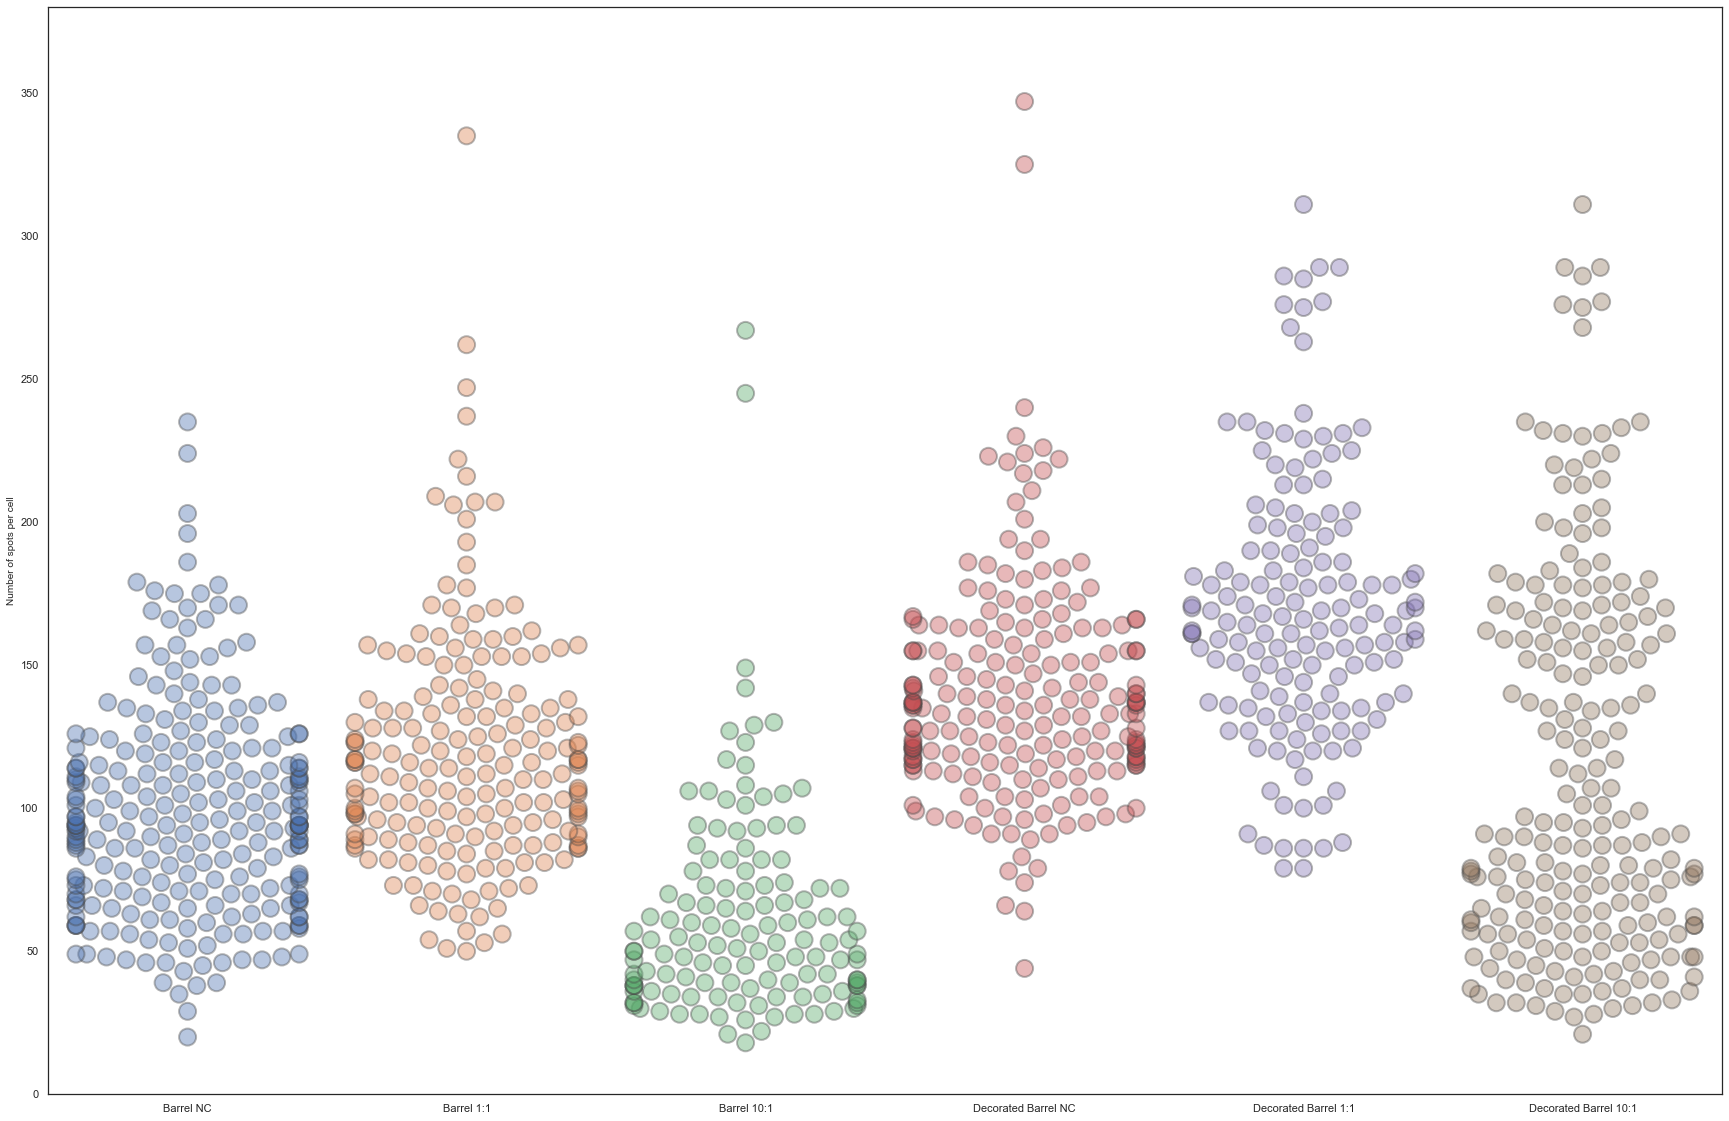

In [130]:
fig, ax = plt.subplots(figsize = (30, 20))
ax.set(ylim=(0, 380))
swarm = sns.swarmplot(data = spot_plot, 
                      dodge = True, 
                      size = 17, 
                      linewidth = 2, 
                      alpha = 0.4)
swarm.set_ylabel("Number of spots per cell", fontsize = 10)
plt.xticks([0,1,2,3,4,5],['Barrel NC', 'Barrel 1:1', 'Barrel 10:1', 'Decorated Barrel NC', 'Decorated Barrel 1:1', 'Decorated Barrel 10:1'])
sns.set(font_scale = 10)
sns.set(style="white")
swarm.figure.savefig("averageSpotPerCell.jpg")

/opt/miniconda3/envs/cellpose/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 28.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/cellpose/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 20.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/cellpose/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 14.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/cellpose/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/cellpose/lib/python3.7/s

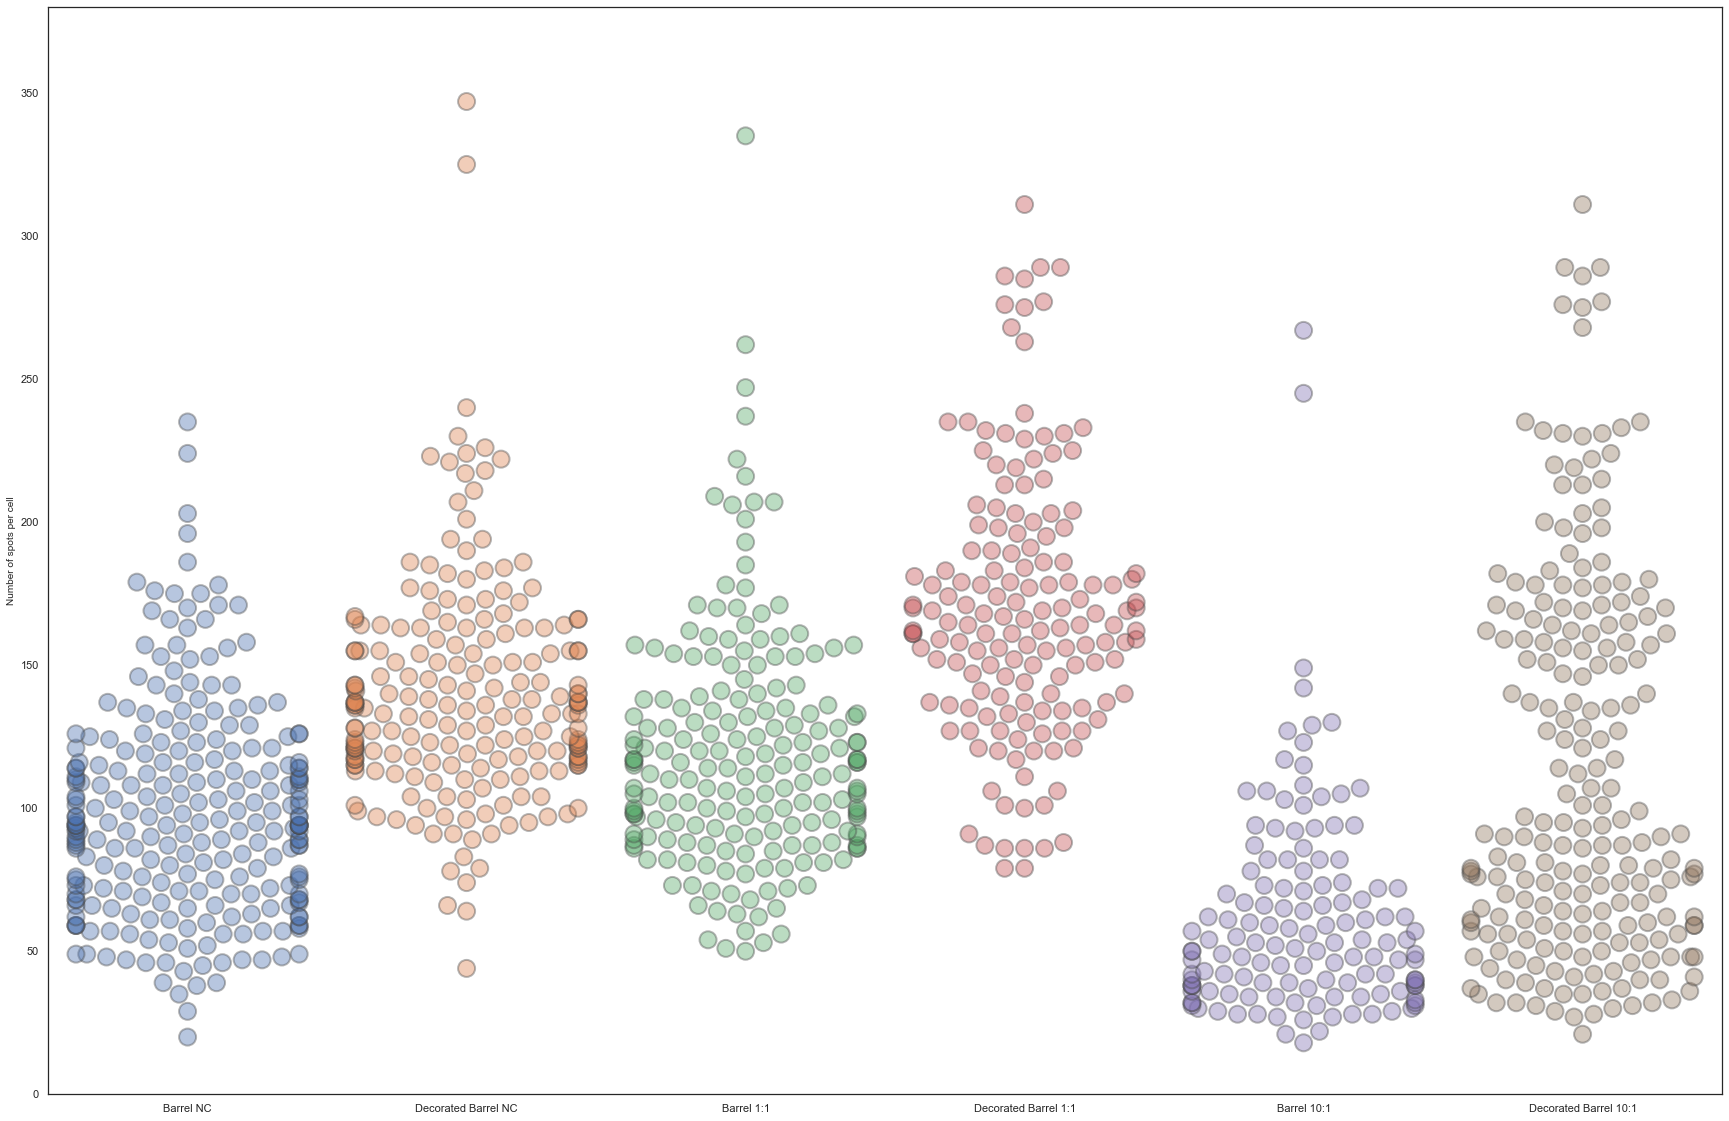

In [131]:
spot_plot2 = new[["barrel_1to0","decbarrel_1to0","barrel_1to1","decbarrel_1to1","barrel_1to10","decbarrel_1to10",]]
fig, ax = plt.subplots(figsize = (30, 20))
ax.set(ylim=(0, 380))
swarm = sns.swarmplot(data = spot_plot2, 
                      dodge = True, 
                      size = 17, 
                      linewidth = 2, 
                      alpha = 0.4)
swarm.set_ylabel("Number of spots per cell", fontsize = 10)
plt.xticks([0,1,2,3,4,5],['Barrel NC', 'Decorated Barrel NC', 'Barrel 1:1', 'Decorated Barrel 1:1', 'Barrel 10:1', 'Decorated Barrel 10:1'])
sns.set(font_scale = 10)
sns.set(style="white")
swarm.figure.savefig("averageSpotPerCell2.jpg")

## Compute the Means of the Spots Columns

In [102]:
mean_barrel_1to0 = spot_plot["barrel_1to0"].mean()
mean_barrel_1to1 = spot_plot["barrel_1to1"].mean()
mean_barrel_1to10 = spot_plot["barrel_1to10"].mean()
mean_decbarrel_1to0 = spot_plot["decbarrel_1to0"].mean()
mean_decbarrel_1to1 = spot_plot["decbarrel_1to1"].mean()
mean_decbarrel_1to10 = spot_plot["decbarrel_1to10"].mean()

mean_barrel = [mean_barrel_1to0, mean_barrel_1to1, mean_barrel_1to10]
mean_decbarrel = [mean_decbarrel_1to0, mean_decbarrel_1to1, mean_decbarrel_1to10]

Text(0, 0.5, 'Average Spots per Cell')

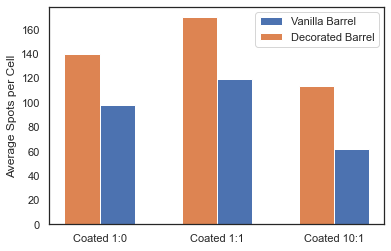

In [114]:
x = np.arange(3)
width = 0.3
plt.bar(x, mean_barrel, width)
plt.bar(x-width, mean_decbarrel, width)
plt.xticks(x-0.15, ['Coated 1:0', 'Coated 1:1', 'Coated 10:1'])
plt.legend(["Vanilla Barrel", "Decorated Barrel"])
plt.ylabel("Average Spots per Cell")

Text(0, 0.5, 'Ratio of Average Spot per Cell')

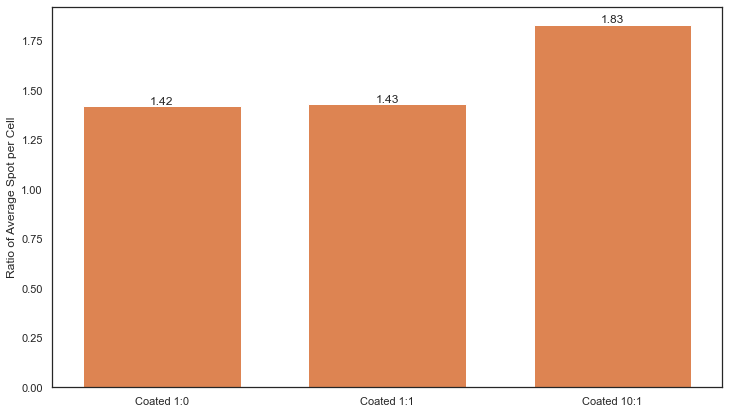

In [126]:
ratio_1to0 = round(mean_decbarrel_1to0/mean_barrel_1to0,2)
ratio_1to1 = round(mean_decbarrel_1to1/mean_barrel_1to1,2)
ratio_1to10 = round(mean_decbarrel_1to10/mean_barrel_1to10,2)
ratios_barrel = [ratio_1to0, ratio_1to1, ratio_1to10]

x = np.arange(3)
width = 0.50

fig, ax = plt.subplots(figsize = (12,7))
bars = ax.bar(x,ratios_barrel,width=0.7)
ax.bar_label(bars)
plt.bar(x, ratios_barrel, 0.7)
plt.xticks(x, ['Coated 1:0', 'Coated 1:1', 'Coated 10:1'])
plt.ylabel('Ratio of Average Spot per Cell')

## Test for Significance

In [123]:
#Performing Wilcoxon Rank Sum Test
_, pval_1to0 = ranksums(spot_plot["barrel_1to0"].to_list(), spot_plot["decbarrel_1to0"].to_list())
_, pval_1to1 = ranksums(spot_plot["barrel_1to1"].to_list(), spot_plot["decbarrel_1to1"].to_list())
_, pval_1to10 = ranksums(spot_plot["barrel_1to10"].to_list(), spot_plot["decbarrel_1to10"].to_list())

In [127]:
print("The p value for vanilla barrel versus decorated barrels at a 1:0 coating ratio is", pval_1to0)
print("The p value for vanilla barrel versus decorated barrels at a 1:1 coating ratio is", pval_1to1)
print("The p value for vanilla barrel versus decorated barrels at a 10:1 coating ratio is", pval_1to10)

The p value for vanilla barrel versus decorated barrels at a 1:0 coating ratio is 2.6117072570045028e-40
The p value for vanilla barrel versus decorated barrels at a 1:1 coating ratio is 7.436333550560577e-15
The p value for vanilla barrel versus decorated barrels at a 10:1 coating ratio is 0.002834839124676831
